<a href="https://colab.research.google.com/github/StupichevA/Linal_Lab_PCA/blob/main/Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [246]:
class Matrix:
    def __init__(self, rows, cols, data=None):
        self.rows = rows
        self.cols = cols

        if data is not None:
            if len(data) != rows or any(len(row) != cols for row in data):
                raise ValueError("Размеры данных не соответствуют указанным rows и cols")
            self.data = data
        else:
            self.data = [[0 for _ in range(cols)] for _ in range(rows)]

    def sum(self, other):
        if self.rows != other.rows or self.cols != other.cols:
            raise ValueError("Матрицы разные")

        result = Matrix(self.rows, self.cols)
        for i in range(self.rows):
            for j in range(self.cols):
                result.data[i][j] = self.data[i][j] + other.data[i][j]
        return result

    def increase(self, scalar):
        result = Matrix(self.rows, self.cols)

        for i in range(self.rows):
            for j in range(self.cols):
                result.data[i][j] = self.data[i][j] * scalar
        return result

    def mult(self, other):
        if self.cols != other.rows:
            raise ValueError("Количество столбцов и строк разное")

        result = Matrix(self.rows, other.cols)
        for i in range(self.rows):
            for j in range(other.cols):
                sum_val = 0
                for k in range(self.cols):
                    sum_val += self.data[i][k] * other.data[k][j]
                result.data[i][j] = sum_val
        return result

    def get_column(self, col_index):
        if col_index < 0 or col_index >= self.cols:
            raise IndexError("Столбец за границей")

        return [row[col_index] for row in self.data]

    def det(self):
      m = [[self.data[i][j] for j in range(self.cols)] for i in range(self.rows)]
      n = self.rows
      det = 1

      for i in range(n):

          x = i
          if m[i][i] == 0:
              flag = True
              for y in range(i + 1, n):
                  if m[y][i] != 0:
                      flag = False
                      x = y
                      break
              if flag:
                  return 0
              else:
                  m[i], m[x] = m[x], m[i]
                  det *= -1

          det *= m[i][i]
          for j in range(i + 1, n):
              factor = m[j][i] / m[i][i]
              for k in range(i, n):
                  m[j][k] -= factor * m[i][k]

      return det

    def corner_det(self, n):
      minor_data = [[self.data[i][j] for j in range(n)] for i in range(n)]
      minor = Matrix(n, n, minor_data)

      return minor.det()

    def __str__(self):
        return '\n'.join([' '.join(map(str, row)) for row in self.data])


In [247]:
def gauss_solver(A: Matrix, b: Matrix):
    """
    Вход:
    A: матрица коэффициентов (n×n). Используется класс Matrix из предыдущей
    лабораторной работы→
    b: вектор правых частей (n×1)
    Выход:
    Raises:
    list[Matrix]: список базисных векторов решения системы
    ValueError: если система несовместна
    """

    if not A.data or not b.data:
        raise ValueError("Матрица пуста")

    if A.rows != A.cols:
        raise ValueError("Матрица  не квадратной")

    if A.rows != b.rows or b.cols != 1:
        raise ValueError("Несоответствие размеров матрицы и вектора")

    n = A.rows
    A = [row.copy() for row in A.data]
    b = [row.copy() for row in b.data]

    lead = 0
    rank = 0

    for r in range(n):
        if lead >= n:
            break

        i = r
        while A[i][lead] == 0:
            i += 1
            if i == n:
                i = r
                lead += 1
                if n == lead:
                    break

        if lead >= n:
            break

        A[i], A[r] = A[r], A[i]
        b[i], b[r] = b[r], b[i]

        pivot = A[r][lead]
        if pivot != 0:
            for j in range(lead, n):
                A[r][j] /= pivot
            b[r][0] /= pivot


            for k in range(n):
                if k != r and A[k][lead] != 0:
                    factor = A[k][lead]
                    for j in range(lead, n):
                        A[k][j] -= factor * A[r][j]
                    b[k][0] -= factor * b[r][0]

            lead += 1
            rank += 1

    # for i in range(rank, n):
    #     if abs(b[i][0]) > 1e-10:
    #         raise ValueError("Система несовместна")

    basis = []
    free_vars = [True] * n

    for i in range(rank):
        for j in range(n):
            if A[i][j] == 1:
                free_vars[j] = False
                break

    for j in range(n):
        if free_vars[j]:
            vec = [0.0] * n
            vec[j] = 1.0

            for i in range(rank):
                for k in range(n):
                    if A[i][k] == 1:
                        vec[k] = -A[i][j]
                        break

            basis.append(vec)

    basis_matrices = []
    for vec in basis:
        basis_matrices.append(Matrix(n, 1, [[x] for x in vec]))

    return basis_matrices

In [248]:
A = Matrix(3,3,[
    [1, 2, 3],
    [1, 2, 3],
    [7, 8, 9]
])
b = Matrix(3,1,[[1], [1], [3]])
res = gauss_solver(A, b)
print(*res)

B = Matrix(2,2,[[0.7015621066093445, 2.0],
[2.0, 5.7015621066093445]])
a = Matrix(2,1,[[0],[0]])
r = gauss_solver(B, a)
print(*r)

1.0
-2.0
1.0



In [249]:
def center_data(X: Matrix) -> Matrix:
  """
  Вход: матрица данных X (n×m)
  Выход: центрированная матрица X_centered (n×m)
  """
  cols = X.cols
  rows = X.rows
  Centered_X = Matrix(rows, cols)
  Centered_X.data = [row.copy() for row in X.data]

  means = [sum(X.get_column(i)) / rows for i in range(cols)]

  for row in range(rows):
    for col in range(cols):
      Centered_X.data[row][col] -= means[col]

  return Centered_X

X = Matrix(3,3, [[1,2,3],[1,3,5],[1,4,6]])
print(center_data(X))
print(X)

0.0 -1.0 -1.666666666666667
0.0 0.0 0.33333333333333304
0.0 1.0 1.333333333333333
1 2 3
1 3 5
1 4 6


In [250]:
def T(X: Matrix) -> Matrix:
  cols = X.cols
  rows = X.rows
  X_T = Matrix(rows, cols)
  X_T.data = [row.copy() for row in X.data]

  for row in range(rows//2 + 1):
    for col in range(cols//2 + 1):
      X_T.data[row][col], X_T.data[col][row] = X_T.data[col][row], X_T.data[row][col]

  return X_T


In [251]:
def covariance_matrix(X_centered: Matrix) -> Matrix:
  """
  Вход: центрированная матрица X_centered (n×m)
  Выход: матрица ковариаций C (m×m)
  """
  cols = X_centered.cols
  rows = X_centered.rows
  E = T(X_centered).mult(X_centered).increase(1/(rows + 1))

  return E

X = Matrix(3,3, [[1,2,3],[1,3,5],[1,4,6]])
print(covariance_matrix(center_data(X)))

0.0 -0.41666666666666674 -0.6388888888888888
0.0 0.08333333333333326 0.111111111111111
0.0 0.33333333333333326 0.5277777777777775


In [252]:
def sturm_sequence(A: Matrix, lambd: float):
    n = A.rows
    A_l = Matrix(n, A.cols)

    for i in range(n):
      for j in range(A.cols):
          A_l.data[i][j] = A.data[i][j]
      A_l.data[i][i] -= lambd

    D = [1, A_l.data[0][0]]
    for i in range(2, n + 1):
      D.append(A_l.corner_det(i))

    return D

def count_sign_changes(sequence):
    count = 0
    for i in range(1, len(sequence)):
        if sequence[i-1]*sequence[i] < 0:
            count += 1
    return count

def bisection_eigenvalues(A, a, b, epsilon=1e-6, max_depth=10):
    eigenvalues = []

    def bisect(a, b, depth=0):
        nonlocal eigenvalues

        if depth > max_depth:
            return

        s_a = count_sign_changes(sturm_sequence(A, a))
        s_b = count_sign_changes(sturm_sequence(A, b))


        n_eigen = abs(s_b - s_a)

        if n_eigen == 0:
            return
        elif n_eigen == 1:
            while b - a > epsilon:
                mid = (a + b)/2
                s_mid = count_sign_changes(sturm_sequence(A, mid))
                if s_mid - s_a == 0:
                    a = mid
                else:
                    b = mid
            eigenvalues.append((a + b)/2)
        else:
            mid = (a + b)/2
            bisect(a, mid, depth+1)
            bisect(mid, b, depth+1)

    bisect(a, b)
    return sorted(eigenvalues)

In [253]:
M = Matrix(2,2,[[4,2],[2,9]])
bisection_eigenvalues(M, -10, 10)


[3.2984378933906555, 9.701562225818634]

In [254]:
def find_eigenvectors(C: Matrix, eigenvalues: list[float]) -> list[Matrix]:
    """
    Вход:
    C: матрица ковариаций (m×m)
    eigenvalues: список собственных значений
    Выход: список собственных векторов (каждый вектор - объект Matrix)
    """
    n = C.rows
    m = C.cols
    I = Matrix(n,m)
    Z = Matrix(n,1)
    for i in range(n):
      for j in range(m):
        if i!=j:
          I.data[i][j] = 0
        else:
          I.data[i][j] = 1

    eigenvectors = []
    for l in eigenvalues:
      print(l, "\n", C.sum(I.increase(-l)))
      for elem in gauss_solver(C.sum(I.increase(-l)), Z):
        eigenvectors.append(elem)

    return eigenvectors

M = Matrix(2,2,[[4,2],[2,9]])
eigenvalues = bisection_eigenvalues(M, -10, 10)
find_eigenvectors(M, eigenvalues)

3.2984378933906555 
 0.7015621066093445 2.0
2.0 5.7015621066093445
9.701562225818634 
 -5.701562225818634 2.0
2.0 -0.701562225818634


[]

In [255]:
def explained_variance_ratio(eigenvalues: list[float], k: int) -> float:
    """
    Вход:
    eigenvalues: список собственных значений
    k: число компонент
    Выход: доля объяснённой дисперсии
    """
    return sum(eigenvalues[:k]) / sum(eigenvalues)



In [256]:
def project_data(X: Matrix, components: Matrix) -> Matrix:
    """Проецирование данных на главные компоненты."""
    n_samples = len(X)
    k = len(components)

    projected = [[0.0] * k for _ in range(n_samples)]

    for i in range(n_samples):
        for j in range(k):
            projected[i][j] = sum(X[i][l] * components[j][l] for l in range(len(X[0])))

    return projected

In [257]:
def pca(X: Matrix, k: int) -> tuple[Matrix, float]:
    """
    Вход:
    X: матрица данных (n×m)
    k: число главных компонент
    Выход:
    X_proj: проекция данных (n×k)
    : доля объяснённой дисперсии
    """
    X_centered = center_data(X)

    cov_matrix = covariance_matrix(X_centered)

    eigenvalues = bisection_eigenvalues(covariance_matrix)
    eigenvectors = find_eigenvectors(X, eigenvalues)

    top_k_eigenvectors = eigenvectors[:k]

    projected_data = project_data(X_centered, top_k_eigenvectors)

    explained_variance = explained_variance_ratio(eigenvectors, k)

    return projected_data, explained_variance

In [258]:
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvasAgg
import io

def plot_pca_projection(X_proj: 'Matrix') -> Figure:
    """
    Вход: проекция данных X_proj (n×2)
    Выход: объект Figure из Matplotlib
    """
    fig = Figure(figsize=(6, 6))
    canvas = FigureCanvasAgg(fig)
    ax = fig.add_subplot(111)

    x = [row[0] for row in X_proj]
    y = [row[1] for row in X_proj]

    ax.scatter(x, y, alpha=0.7, edgecolors='w', s=40)

    ax.set_title('2D Projection via PCA', pad=15)
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.grid(True, linestyle='--', alpha=0.6)

    return fig


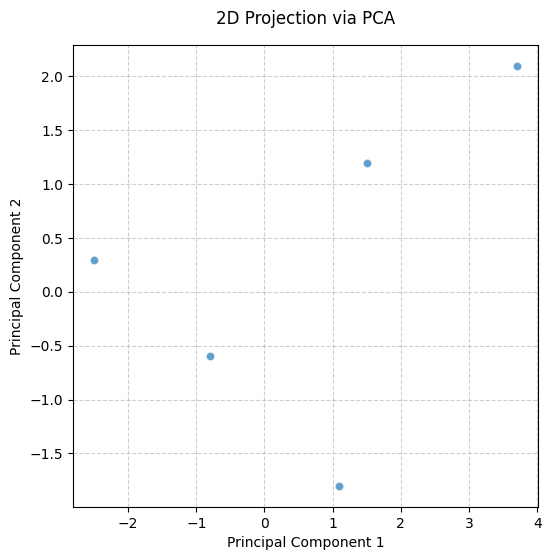

In [259]:
projected_data = [
    [-2.5, 0.3],
    [1.1, -1.8],
    [3.7, 2.1],
    [-0.8, -0.6],
    [1.5, 1.2]
]

fig = plot_pca_projection(projected_data)
fig

In [260]:
def reconstruction_error(X_orig:'Matrix', X_recon:'Matrix') -> float:
    """
    Вход:
    X_orig: исходные данные (n×m)
    X_recon: восстановленные данные (n×m)
    Выход: среднеквадратическая ошибка MSE
    """
    n = X_orig.rows
    m = X_orig[0].cols
    total_squared_error = 0.0

    for i in range(n):
        for j in range(m):
            total_squared_error += (X_orig[i][j] - X_recon[i][j]) ** 2

    return total_squared_error / (n * m)